In [15]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import ConnectionPatch

In [16]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [17]:
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]
sda_sde_table_dir = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/da_de_peaks"

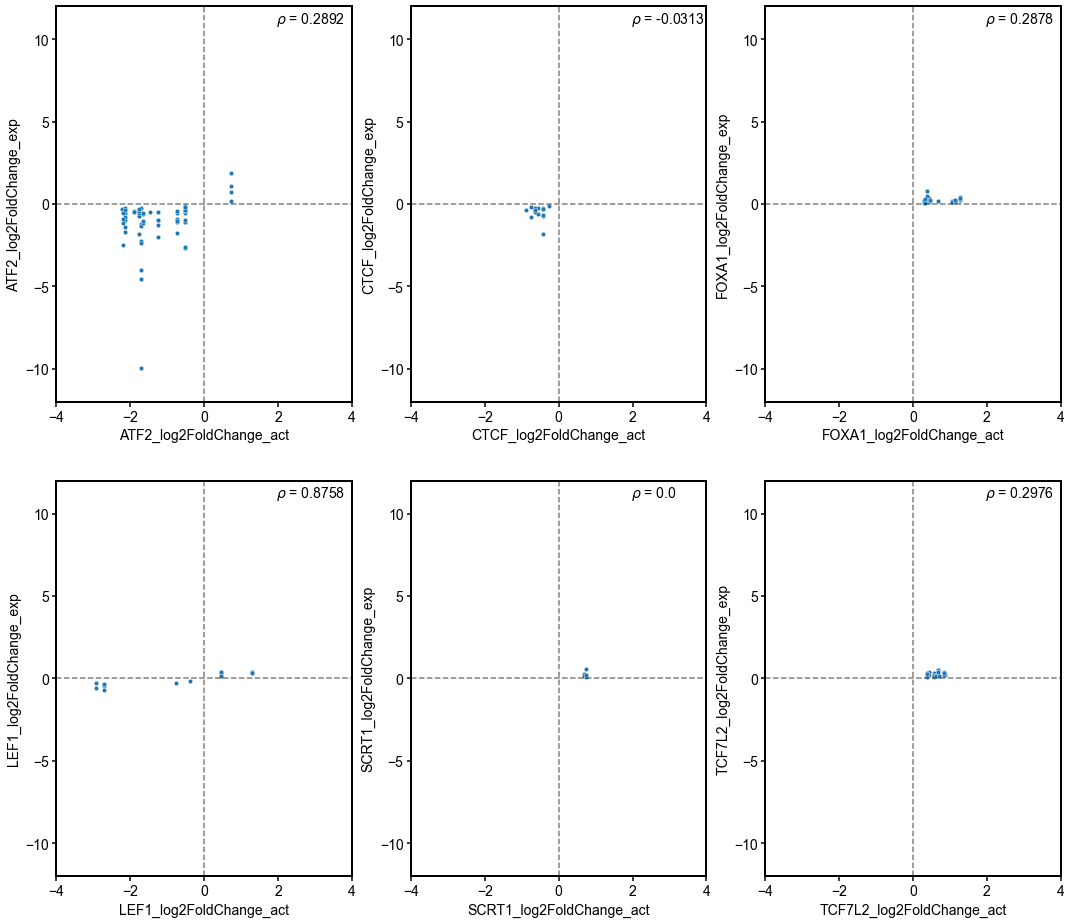

In [18]:
# define canvas
fig, axes = plt.subplots(2, 3, figsize=(18, 16))
rlib = np.reshape(libraries[1:-1], (2,3))

for row in range(2):
    for col in range(3):
        lib_name = rlib[row, col]
        lib_file = os.path.join(sda_sde_table_dir, lib_name, "abc_sda_sde_table_peaks_proportional.csv")
        lib_df = pd.read_csv(lib_file)
        sns.scatterplot(data=lib_df, x=f"{lib_name}_log2FoldChange_act", y=f"{lib_name}_log2FoldChange_exp", ax=axes[row][col], s=20)
        axes[row][col].set_xlim(-4, 4)
        axes[row][col].set_ylim(-12, 12)
        axes[row][col].axhline(0, color="k", alpha=0.5, ls="--")
        axes[row][col].axvline(0, color="k", alpha=0.5, ls="--")
        corr=round(lib_df[f"{lib_name}_log2FoldChange_act"].corr(lib_df[f"{lib_name}_log2FoldChange_exp"], method="spearman"), 4)
        axes[row][col].text(1.95, 11, fr"$\rho$ = {corr}") 

In [23]:
lib_df.gene_name.unique()

array(['CLP1', 'MED19', 'SSRP1', 'TIMM10', 'TMX2', 'TNKS1BP1', 'ZDHHC5',
       'EIF2AK3', 'HK2', 'LINC01291', 'POLE4', 'RPIA', 'CMSS1', 'COX17',
       'KLF15', 'NIT2', 'TBC1D23', 'TMEM39A', 'TMEM45A', 'TOMM70', 'AGK',
       'SSBP1', 'MCM4', 'PRKDC', 'CDK16', 'NDUFB11', 'RBM10', 'UBA1',
       'USP11', 'ZNF674-AS1'], dtype=object)

In [5]:
save_file = "../data/figures/enhancer_gene_corr2_abc.pdf"
save_pdf(save_file, fig)

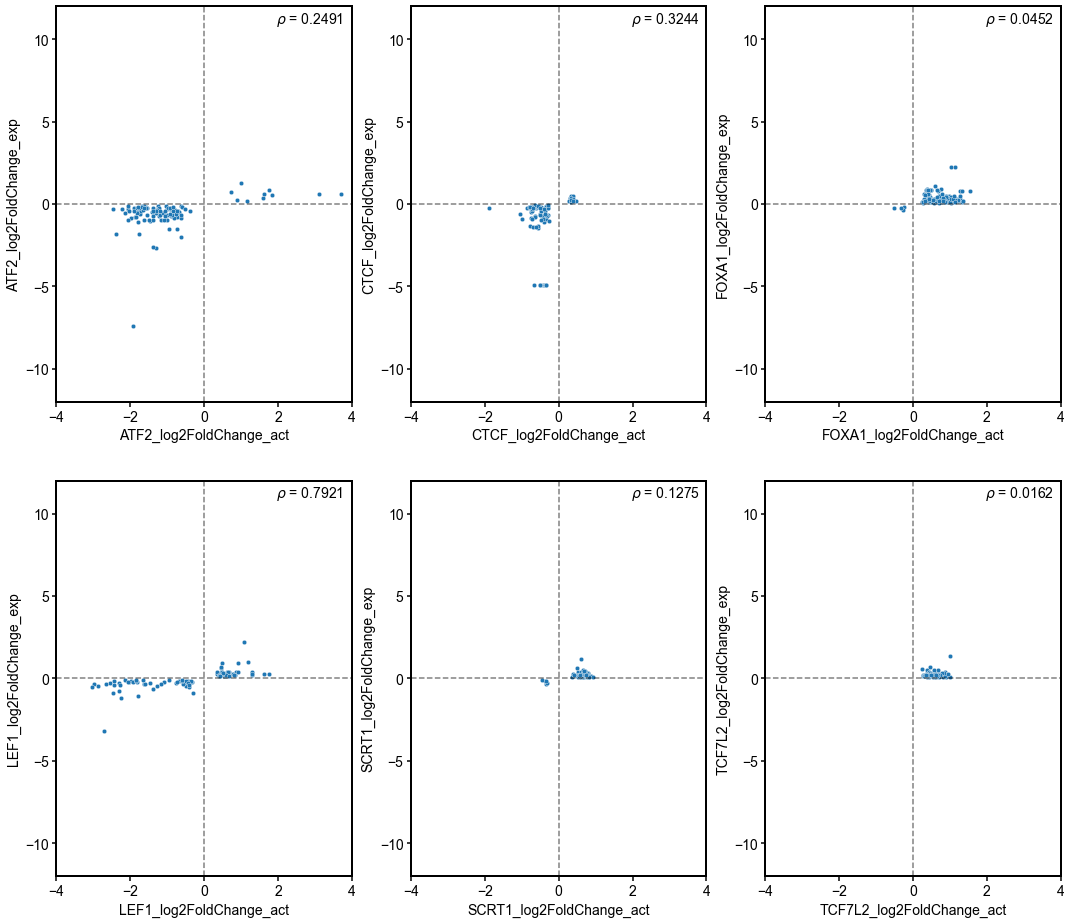

In [13]:
# define canvas
fig, axes = plt.subplots(2, 3, figsize=(18, 16))
rlib = np.reshape(libraries[1:-1], (2,3))

for row in range(2):
    for col in range(3):
        lib_name = rlib[row, col]
        lib_file = os.path.join(sda_sde_table_dir, lib_name, "nearest_sda_sde_table_peaks_proportional.csv")
        lib_df = pd.read_csv(lib_file)
        sns.scatterplot(data=lib_df, x=f"{lib_name}_log2FoldChange_act", y=f"{lib_name}_log2FoldChange_exp", ax=axes[row][col], s=20)
        axes[row][col].set_xlim(-4, 4)
        axes[row][col].set_ylim(-12, 12)
        axes[row][col].axhline(0, color="k", alpha=0.5, ls="--")
        axes[row][col].axvline(0, color="k", alpha=0.5, ls="--")
        corr=round(lib_df[f"{lib_name}_log2FoldChange_act"].corr(lib_df[f"{lib_name}_log2FoldChange_exp"], method="spearman"), 4)
        axes[row][col].text(1.95, 11, fr"$\rho$ = {corr}") 

In [7]:
save_file = "../data/figures/enhancer_gene_corr2_nearest.pdf"
save_pdf(save_file, fig)